In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
import sklearn

In [72]:
import joblib

In [73]:
heart_disease_dataset = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
heart_disease_dataset

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


# EDA

In [74]:
heart_disease_dataset.shape

(253680, 22)

In [75]:
heart_disease_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [76]:
#Dataset has already been cleaned of null values 

In [77]:
heart_disease_dataset.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,-0.058972,-0.057882,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


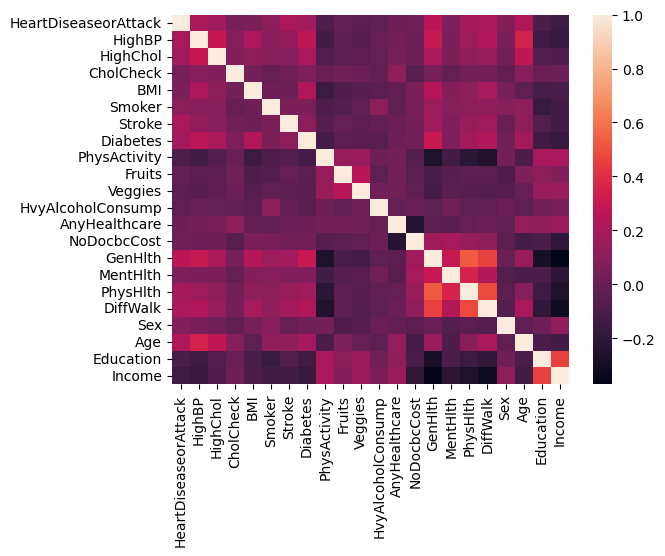

In [78]:
#Looking at possible correlation between values
heart_disease_corr = heart_disease_dataset.corr()
sns.heatmap(data = heart_disease_corr)
heart_disease_corr.style.background_gradient(cmap='coolwarm')

At first glance, there doesn't seem to be any particular correlation between our values, the highest correlations being between general health and physical health, which does not come as a surprise.
The correlation between physical health and difficulty walking is one of the highest here but is objectively not that high. 
There also seem to be a correlation between education and income (which is not that high either here).

In [79]:
#Finding out the proportion of male and female
#Female = 0, Male = 1
heart_disease_dataset["Sex"].value_counts()

0.0    141974
1.0    111706
Name: Sex, dtype: int64

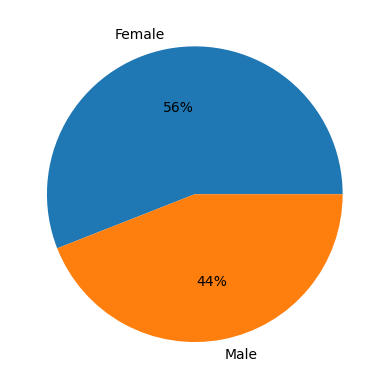

In [80]:
sex_count = heart_disease_dataset["Sex"].value_counts()
labels = ["Female","Male"]
plt.pie(sex_count, labels = labels, autopct = '%0.0f%%')
plt.show()

Female are more represented in the dataset, but male are represented enough to avoid having a "female biais" on the conclusions

In [81]:
#Verifying that we only have 0 and 1 in our dependant variable "HeartDiseaseorAttack"
heart_disease_dataset["HeartDiseaseorAttack"].unique()

array([0., 1.])

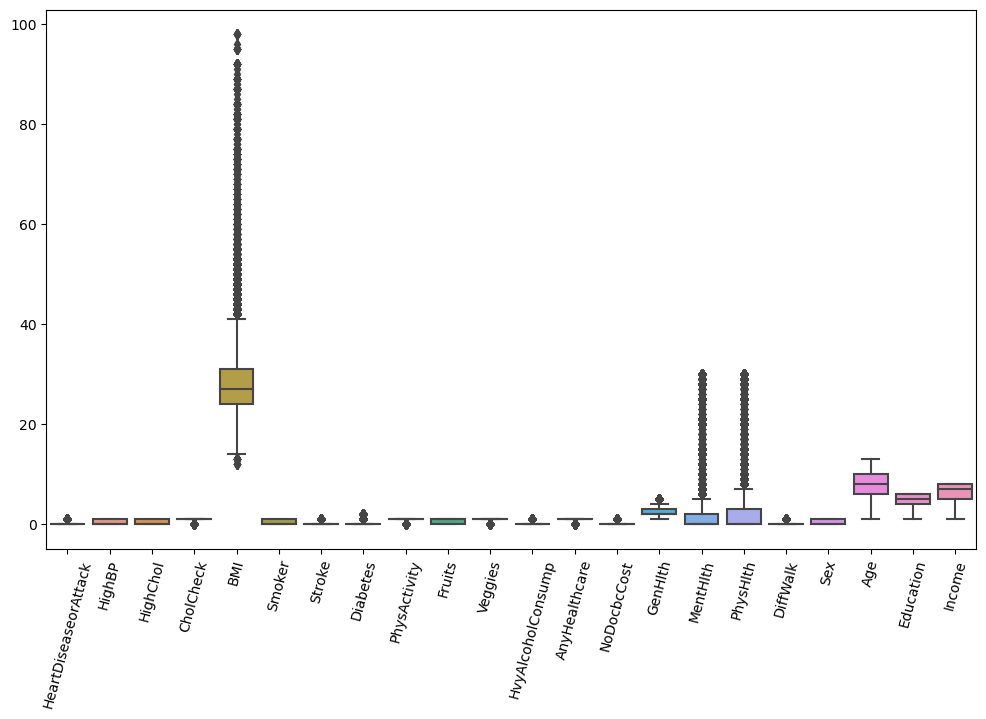

In [82]:
#Data distribution
plt.figure(figsize=(12,7))
sns.boxplot(data = heart_disease_dataset)
plt.xticks(rotation = 75)
plt.show()

As seen when describing the data, BMI, mental health and physical health have the highest standard deviation, and therefore a lot of outliers

In [98]:
#Looking at the heart disorders age repartiton

In [88]:
# Counting the number of values by age
Has_a_disorder = heart_disease_dataset[heart_disease_dataset["HeartDiseaseorAttack"] == 1]
nb_heartdisorder_by_age = Has_a_disorder["HeartDiseaseorAttack"].groupby(Has_a_disorder["Age"]).value_counts()
nb_heartdisorder_by_age = pd.DataFrame(nb_heartdisorder_by_age)
nb_heartdisorder_by_age.rename(columns = {"HeartDiseaseorAttack": "nb_of_people_with_disorder"}, inplace = True)
nb_heartdisorder_by_age.reset_index()

,Age,HeartDiseaseorAttack,nb_of_people_with_disorder
0,1.0,1.0,29
1,2.0,1.0,54
2,3.0,1.0,126
3,4.0,1.0,193
4,5.0,1.0,351
5,6.0,1.0,712
6,7.0,1.0,1425
7,8.0,1.0,2253
8,9.0,1.0,3358
9,10.0,1.0,4193


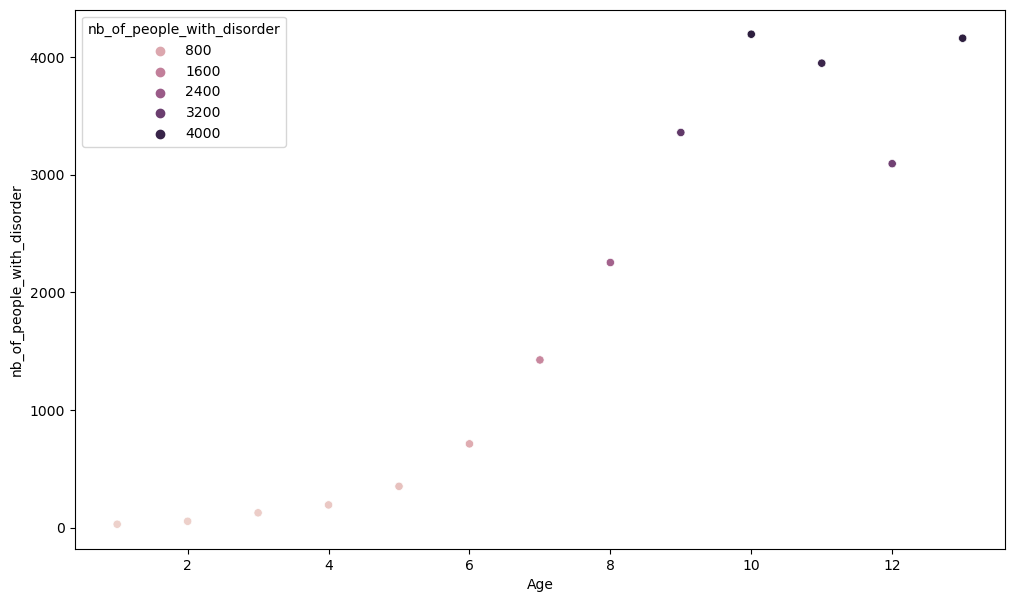

In [99]:
plt.figure(figsize = (12,7))
sns.scatterplot(data = nb_heartdisorder_by_age, x = "Age", y = "nb_of_people_with_disorder", hue = "nb_of_people_with_disorder")
plt.show()

Age is classified as follows : 

1 Age 18 to 24

2 Age 25 to 29

3 Age 30 to 34

4 Age 35 to 39

5 Age 40 to 44

6 Age 45 to 49

7 Age 50 to 54

8 Age 55 to 59

9 Age 60 to 64

10 Age 65 to 69

11 Age 70 to 74

12 Age 75 to 79

13 Age 80 or older

The number of heart disorders increases with age